# Notebook 01: Data Exploration

**Goal**: Understand the Mozilla alerts dataset structure, distributions, and quality

In this notebook, we'll:
1. Load the alerts data
2. Understand the class distribution (regressions vs. non-regressions)
3. Explore feature distributions
4. Identify missing values and data quality issues

## 1. Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

## 2. Load the Dataset

In [10]:
# Load alerts data
alerts = pd.read_csv("../Input/alerts_data.csv")

print(f"Dataset shape: {alerts.shape}")
print(f"Total alerts: {len(alerts):,}")
print(f"Total features: {alerts.shape[1]}")

Dataset shape: (17989, 62)
Total alerts: 17,989
Total features: 62


## 3. Initial Data Inspection

In [11]:
# View first few rows
alerts.head()

,single_alert_new_value,single_alert_classifier,alert_summary_prev_push_revision,alert_summary_id,single_alert_amount_pct,alert_summary_performance_tags,single_alert_prev_value,alert_summary_first_triaged,single_alert_series_signature_has_subtests,alert_summary_framework,single_alert_series_signature_framework_id,single_alert_series_signature_suite_public_name,alert_summary_related_alerts,single_alert_taskcluster_metadata_retry_id,alert_summary_prev_push_id,alert_summary_status,alert_summary_push_id,single_alert_status,alert_summary_assignee_username,single_alert_series_signature_signature_hash,single_alert_prev_taskcluster_metadata_task_id,single_alert_series_signature_machine_platform,alert_summary_bug_number,alert_summary_repository,alert_summary_bug_due_date,...,single_alert_classifier_email,single_alert_backfill_record_total_backfills_failed,single_alert_backfill_record_total_actions_triggered,alert_summary_assignee_email,alert_summary_creation_timestamp,single_alert_prev_profile_url,alert_summary_notes,single_alert_series_signature_test,single_alert_noise_profile,single_alert_series_signature_lower_is_better,alert_summary_revision,single_alert_related_summary_id,alert_summary_bug_updated,single_alert_profile_url,single_alert_backfill_record_context,single_alert_starred,single_alert_backfill_record_total_backfills_in_progress,single_alert_t_value,single_alert_series_signature_suite,single_alert_series_signature_extra_options,single_alert_backfill_record_status,single_alert_series_signature_tags,alert_summary_triage_due_date,push_timestamp,signature_id
0,9.60,mozilla-ldap/nchevobbe@mozilla.com,702dc0aa87a8c3e4929277c1dc8220a7dd72418f,38845.0,4.71,NaN,10.08,2023-06-23 14:14:20.453894,False,12.0,12.0,NaN,|177677|,NaN,1261278.0,2.0,1261541.0,2.0,NaN,1467106a81e6c19c8f7203e576298427d552b4a3,NaN,windows10-64-shippable-qr,NaN,autoland,2023-06-30 06:18:02.024736,...,nchevobbe@mozilla.com,NaN,NaN,NaN,2023-06-23 06:18:02.024736,NaN,NaN,custom.styleeditor.close.DAMP,OK,True,78880280c2765ec0520ece3184fc8fdbac5b5356,38852.0,NaN,NaN,NaN,False,NaN,9.06,damp,"e10s, fission, stylo, webrender",NaN,NaN,2023-06-28 06:18:02.024736,2023-06-21 20:43:57,4768977
1,10.58,mozilla-ldap/jdescottes@mozilla.com,25a29224e55d9a839d6fddde206208a453535ec8,39272.0,9.59,NaN,9.65,2023-08-14 08:38:03.490554,False,12.0,12.0,NaN,|179573|179581|,NaN,1284750.0,5.0,1285020.0,2.0,NaN,1467106a81e6c19c8f7203e576298427d552b4a3,NaN,windows10-64-shippable-qr,NaN,autoland,2023-08-18 01:00:27.106098,...,jdescottes@mozilla.com,NaN,NaN,NaN,2023-08-11 01:00:27.106098,NaN,NaN,custom.styleeditor.close.DAMP,OK,True,46b5603cd2b8de629b659ec8d44fc7b086782c46,39297.0,NaN,NaN,NaN,False,NaN,9.03,damp,"e10s, fission, stylo, webrender",NaN,NaN,2023-08-16 01:00:27.106098,2023-08-09 13:49:06,4768977
2,10.09,mozilla-ldap/jdescottes@mozilla.com,11f47f2a1cf08c1e0b5bb6374f2a7dd1f49c8cac,39287.0,5.54,NaN,10.68,2023-08-14 09:06:16.991824,False,12.0,12.0,NaN,|179664|179668|179670|179671|,NaN,1285701.0,6.0,1285800.0,4.0,mozilla-ldap/jdescottes@mozilla.com,1467106a81e6c19c8f7203e576298427d552b4a3,NaN,windows10-64-shippable-qr,NaN,autoland,2023-08-21 14:07:14.457937,...,jdescottes@mozilla.com,NaN,NaN,jdescottes@mozilla.com,2023-08-12 14:07:14.457937,NaN,NaN,custom.styleeditor.close.DAMP,OK,True,42a4b2af29229dbfd0675767afaf6965d292e4a7,NaN,NaN,NaN,NaN,False,NaN,8.01,damp,"e10s, fission, stylo, webrender",NaN,NaN,2023-08-17 14:07:14.457937,2023-08-10 16:07:39,4768977
3,10.70,mozilla-ldap/nchevobbe@mozilla.com,2ea4fd5d517a2b5edf081c9e2ccd8c014f6dc171,39510.0,4.78,NaN,10.21,2023-09-18 09:02:06.760641,False,12.0,12.0,NaN,NaN,NaN,1298638.0,2.0,1298722.0,2.0,NaN,1467106a81e6c19c8f7203e576298427d552b4a3,NaN,windows10-64-shippable-qr,NaN,autoland,2023-09-20 12:59:31.781849,...,nchevobbe@mozilla.com,NaN,NaN,NaN,2023-09-13 12:59:31.781849,NaN,NaN,custom.styleeditor.close.DAMP,OK,True,1413faf09741cee78dbc0928cf65d1123de28ed7,39501.0,NaN,NaN,NaN,False,NaN,8.06,damp,"e10s, fission, stylo, webrender",NaN,NaN,2023

In [12]:
# Check data types
alerts.dtypes

single_alert_new_value                                      float64
single_alert_classifier                                      object
alert_summary_prev_push_revision                             object
alert_summary_id                                            float64
single_alert_amount_pct                                     float64
alert_summary_performance_tags                               object
single_alert_prev_value                                     float64
alert_summary_first_triaged                                  object
single_alert_series_signature_has_subtests                     bool
alert_summary_framework                                     float64
single_alert_series_signature_framework_id                  float64
single_alert_series_signature_suite_public_name             float64
alert_summary_related_alerts                                 object
single_alert_taskcluster_metadata_retry_id                  float64
alert_summary_prev_push_id                      

In [13]:
# Basic statistics for numeric columns
alerts.describe()

,single_alert_new_value,alert_summary_id,single_alert_amount_pct,single_alert_prev_value,alert_summary_framework,single_alert_series_signature_framework_id,single_alert_series_signature_suite_public_name,single_alert_taskcluster_metadata_retry_id,alert_summary_prev_push_id,alert_summary_status,alert_summary_push_id,single_alert_status,alert_summary_bug_number,single_alert_series_signature_test_public_name,alert_summary_issue_tracker,single_alert_amount_abs,single_alert_id,single_alert_summary_id,single_alert_prev_taskcluster_metadata_retry_id,single_alert_prev_profile_url,single_alert_related_summary_id,single_alert_profile_url,single_alert_t_value,signature_id
count,1.798900e+04,17989.000000,17989.000000,1.798900e+04,17989.000000,17989.000000,0.0,4303.000000,1.798900e+04,17989.000000,1.798900e+04,17989.000000,4.471000e+03,0.0,17989.0,1.798900e+04,17989.000000,17989.000000,4308.000000,0.0,5897.000000,0.0,1.798900e+04,1.798900e+04
mean,2.620783e+06,39344.318750,103.993529,2.678651e+06,10.497359,10.497359,NaN,0.005345,1.335506e+06,3.297182,1.335810e+06,2.783479,1.852327e+06,NaN,1.0,-5.786768e+04,179517.598977,39344.318750,0.004875,NaN,39256.420553,NaN,2.965224e+12,4.269364e+06
std,3.000483e+07,6604.707896,4761.977798,3.139582e+07,4.075854,4.075854,NaN,0.079042,4.939211e+04,1.886442,4.941836e+04,1.378616,4.483635e+04,NaN,0.0,2.737563e+06,31015.962693,6604.707896,0.081911,NaN,6697.270729,NaN,1.642637e+14,5.737018e+05
min,-6.603300e+02,1.000000,0.030000,1.000000e-02,1.000000,1.000000,NaN,0.000000,1.244063e+06,0.000000,1.244253e+06,0.000000,1.171441e+06,NaN,1.0,-1.160267e+08,1.000000,1.000000,0.000000,NaN,3.000000,NaN,7.000000e+00,1.468481e+06
25%,2.329700e+02,39314.000000,4.570000,2.324900e+02,12.000000,12.000000,NaN,0.000000,1.292771e+06,2.000000,1.292913e+06,2.000000,1.839665e+06,NaN,1.0,-5.702000e+01,179836.000000,39314.000000,0.000000,NaN,39301.000000,NaN,7.570000e+00,3.779791e+06
50%,6.179200e+02,40405.000000,8.760000,6.055300e+02,13.000000,13.000000,NaN,0.000000,1.341055e+06,4.000000,1.341197e+06,3.000000,1.862218e+06,NaN,1.0,-4.510000e+00,184507.000000,40405.000000,0.000000,NaN,40322.000000,NaN,9.160000e+00,4.375286e+06
75%,1.404020e+03,41347.000000,17.980000,1.400000e+03,13.000000,13.000000,NaN,0.000000,1.374419e+06,5.000000,1.374550e+06,4.000000,1.879806e+06,NaN,1.0,4.673000e+01,189114.000000,41347.000000,0.000000,NaN,41348.000000,NaN,1.397000e+01,4.768845e+06
max,1.095123e+09,42365.000000,461900.000000,1.110687e+09,15.000000,15.000000,NaN,2.000000,1.423368e+06,8.000000,1.423417e+06,4.000000,1.896379e+06,NaN,1.0,8.271574e+07,193696.000000,42365.000000,3.000000,NaN,42365.000000,NaN,1.423659e+16,5.122201e+06


## 4. Class Distribution (Target Variable)

Let's see how many alerts are labeled as regressions vs. improvements/noise.

In [14]:
# Count of each class
print("Class Distribution:")
print(alerts["single_alert_is_regression"].value_counts(dropna=False))
print("\nPercentages:")
print(alerts["single_alert_is_regression"].value_counts(normalize=True, dropna=False) * 100)

Class Distribution:
single_alert_is_regression
False    10377
True      7612
Name: count, dtype: int64

Percentages:
single_alert_is_regression
False    57.685252
True     42.314748
Name: proportion, dtype: float64


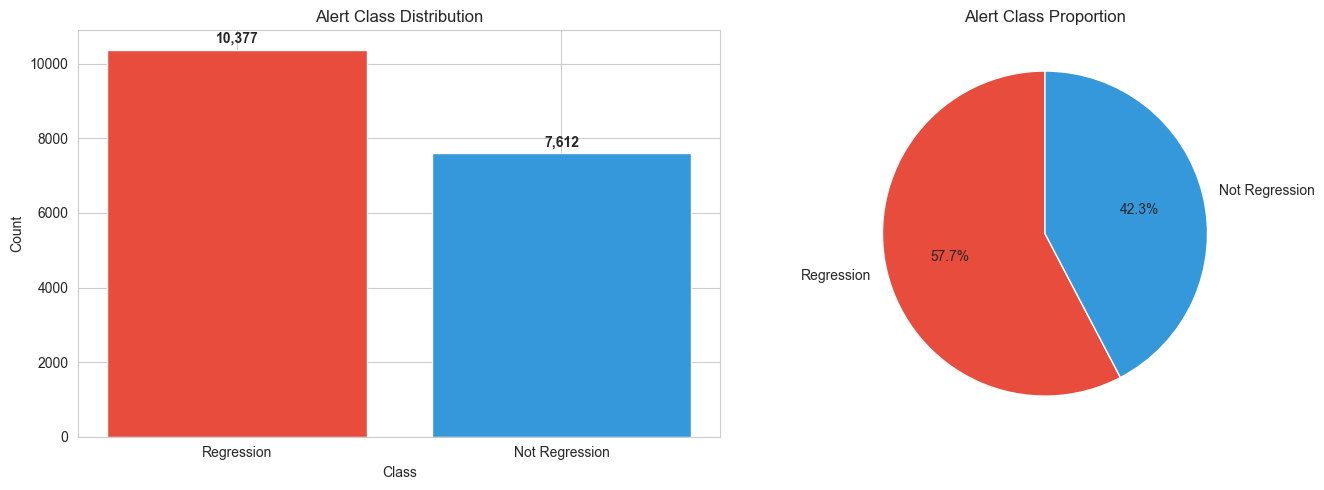


✓ Saved: results/figures/class_distribution.png


In [15]:
# Visualize class distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
class_counts = alerts["single_alert_is_regression"].value_counts()
ax[0].bar(['Regression', 'Not Regression'], class_counts.values, color=['#e74c3c', '#3498db'])
ax[0].set_ylabel('Count')
ax[0].set_title('Alert Class Distribution')
ax[0].set_xlabel('Class')
for i, v in enumerate(class_counts.values):
    ax[0].text(i, v + 100, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
ax[1].pie(class_counts.values, labels=['Regression', 'Not Regression'], 
          autopct='%1.1f%%', colors=['#e74c3c', '#3498db'], startangle=90)
ax[1].set_title('Alert Class Proportion')

plt.tight_layout()
plt.savefig('../results/figures/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: results/figures/class_distribution.png")

## 5. Missing Values Analysis

In [16]:
# Calculate missing value percentages
missing = pd.DataFrame({
    'Column': alerts.columns,
    'Missing_Count': alerts.isnull().sum(),
    'Missing_Percent': (alerts.isnull().sum() / len(alerts) * 100)
})

# Filter columns with any missing values
missing_data = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"Columns with missing values: {len(missing_data)} out of {len(alerts.columns)}")
print("\nTop 20 columns by missing percentage:")
print(missing_data.head(20))

Columns with missing values: 30 out of 62

Top 20 columns by missing percentage:
                                                                                               Column  \
single_alert_series_signature_suite_public_name       single_alert_series_signature_suite_public_name   
single_alert_series_signature_test_public_name         single_alert_series_signature_test_public_name   
single_alert_profile_url                                                     single_alert_profile_url   
single_alert_prev_profile_url                                           single_alert_prev_profile_url   
single_alert_backfill_record_total_backfills_su...  single_alert_backfill_record_total_backfills_s...   
single_alert_backfill_record_total_actions_trig...  single_alert_backfill_record_total_actions_tri...   
single_alert_backfill_record_total_backfills_fa...  single_alert_backfill_record_total_backfills_f...   
single_alert_backfill_record_context                             single_alert_b

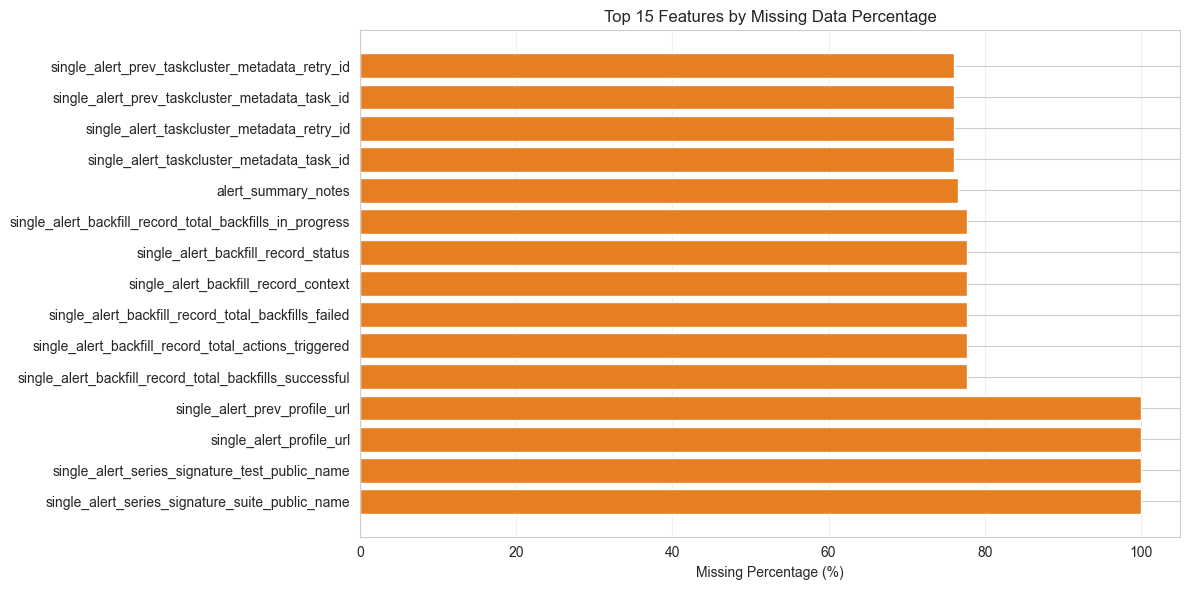


✓ Saved: results/figures/missing_values.png


In [17]:
# Visualize missing data for top features
if len(missing_data) > 0:
    top_missing = missing_data.head(15)
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_missing)), top_missing['Missing_Percent'], color='#e67e22')
    plt.yticks(range(len(top_missing)), top_missing['Column'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 15 Features by Missing Data Percentage')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/figures/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Saved: results/figures/missing_values.png")
else:
    print("No missing values found!")

## 6. Feature Analysis: Magnitude Signals

Let's examine the key numeric features that measure alert magnitude.

In [18]:
# Key magnitude features
magnitude_features = [
    'single_alert_amount_abs',
    'single_alert_amount_pct',
    'single_alert_t_value',
    'single_alert_prev_value',
    'single_alert_new_value'
]

# Check if all features exist
available_mag_features = [f for f in magnitude_features if f in alerts.columns]
print(f"Available magnitude features: {available_mag_features}")

# Display statistics
if available_mag_features:
    print("\nMagnitude Features Statistics:")
    print(alerts[available_mag_features].describe())

Available magnitude features: ['single_alert_amount_abs', 'single_alert_amount_pct', 'single_alert_t_value', 'single_alert_prev_value', 'single_alert_new_value']

Magnitude Features Statistics:
       single_alert_amount_abs  single_alert_amount_pct  single_alert_t_value  \
count             1.798900e+04             17989.000000          1.798900e+04   
mean             -5.786768e+04               103.993529          2.965224e+12   
std               2.737563e+06              4761.977798          1.642637e+14   
min              -1.160267e+08                 0.030000          7.000000e+00   
25%              -5.702000e+01                 4.570000          7.570000e+00   
50%              -4.510000e+00                 8.760000          9.160000e+00   
75%               4.673000e+01                17.980000          1.397000e+01   
max               8.271574e+07            461900.000000          1.423659e+16   

       single_alert_prev_value  single_alert_new_value  
count             1

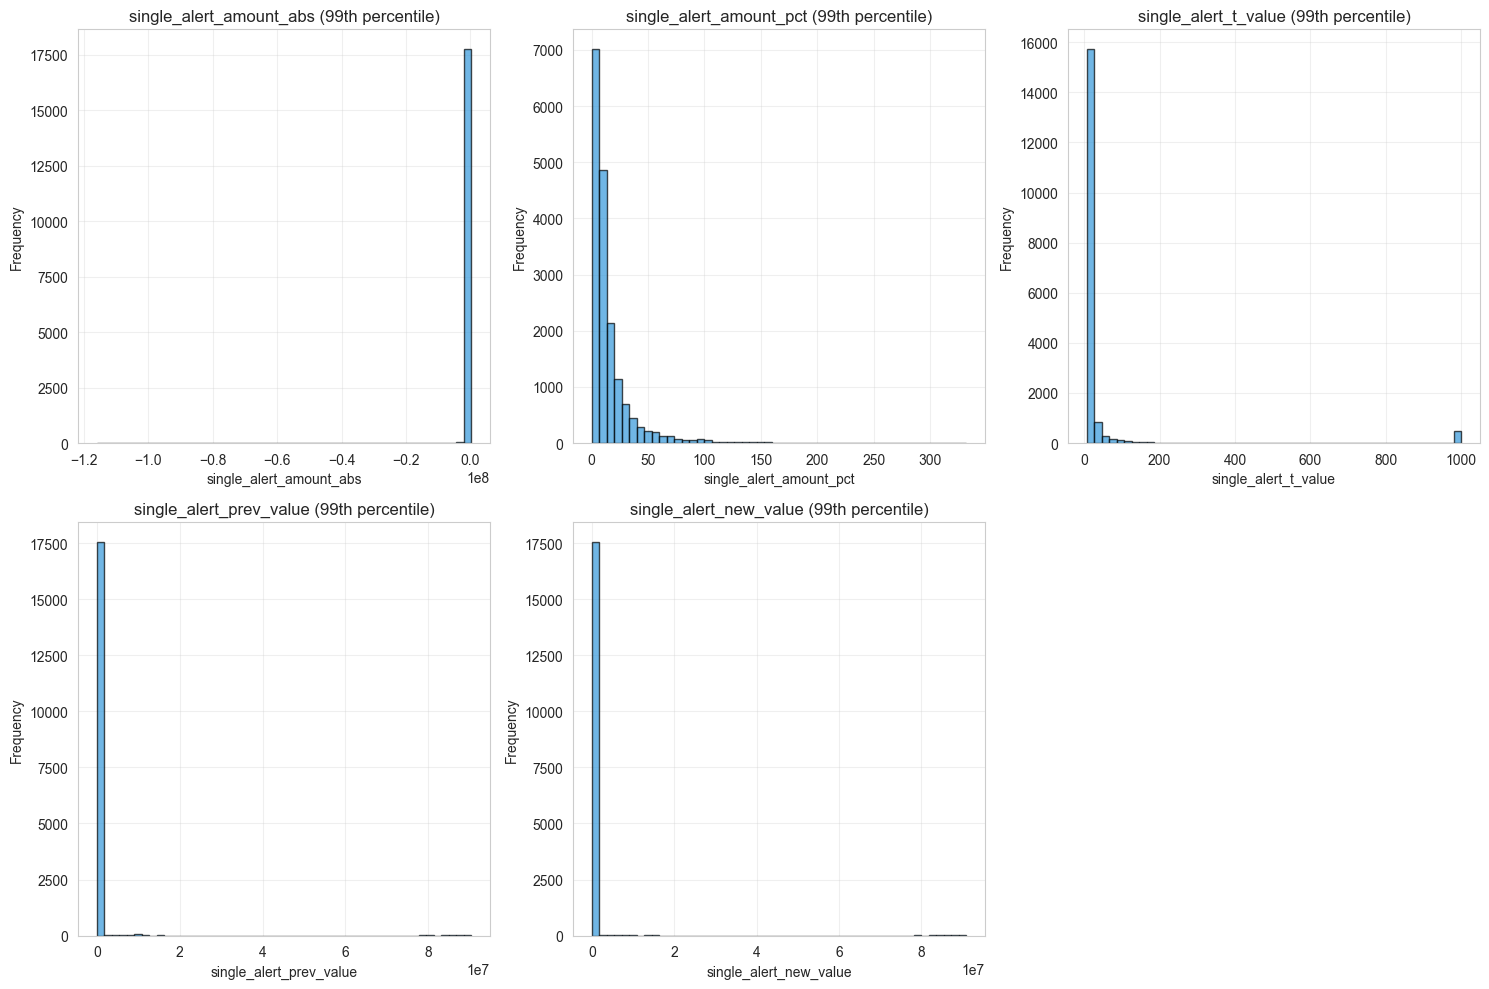


✓ Saved: results/figures/magnitude_distributions.png


In [19]:
# Visualize magnitude feature distributions
if len(available_mag_features) >= 3:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, feature in enumerate(available_mag_features[:6]):
        if idx < len(axes):
            # Remove outliers for better visualization (keep 99th percentile)
            data = alerts[feature].dropna()
            if len(data) > 0:
                q99 = data.quantile(0.99)
                filtered_data = data[data <= q99]
                
                axes[idx].hist(filtered_data, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
                axes[idx].set_xlabel(feature)
                axes[idx].set_ylabel('Frequency')
                axes[idx].set_title(f'{feature} (99th percentile)')
                axes[idx].grid(alpha=0.3)
    
    # Hide unused subplots
    for idx in range(len(available_mag_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../results/figures/magnitude_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Saved: results/figures/magnitude_distributions.png")

## 7. Feature Analysis: Context Features

Categorical features that provide context about where the alert occurred.

In [20]:
# Key context features
context_features = [
    'repository_name',
    'machine_platform',
    'single_alert_series_signature_suite',
    'framework_id'
]

# Check availability
available_ctx_features = [f for f in context_features if f in alerts.columns]
print(f"Available context features: {available_ctx_features}")

Available context features: ['single_alert_series_signature_suite']


In [21]:
# Analyze each context feature
for feature in available_ctx_features:
    print(f"\n{'='*60}")
    print(f"Feature: {feature}")
    print(f"{'='*60}")
    print(f"Unique values: {alerts[feature].nunique()}")
    print(f"Missing values: {alerts[feature].isnull().sum()} ({alerts[feature].isnull().sum()/len(alerts)*100:.2f}%)")
    print(f"\nTop 10 most common values:")
    print(alerts[feature].value_counts().head(10))


Feature: single_alert_series_signature_suite
Unique values: 186
Missing values: 0 (0.00%)

Top 10 most common values:
single_alert_series_signature_suite
damp             3614
Strings          1690
instagram         695
espn              593
facebook          449
amazon            418
microsoft         400
bing-search       336
twitter           328
SegmenterPerf     322
Name: count, dtype: int64


In [22]:
# Visualize repository distribution
if 'repository_name' in alerts.columns:
    repo_counts = alerts['repository_name'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(repo_counts)), repo_counts.values, color='#2ecc71')
    plt.yticks(range(len(repo_counts)), repo_counts.index)
    plt.xlabel('Number of Alerts')
    plt.title('Top 10 Repositories by Alert Count')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/figures/repository_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Saved: results/figures/repository_distribution.png")

## 8. Regression vs. Non-Regression: Feature Comparison

Compare key features between regression and non-regression alerts.

In [23]:
# Compare magnitude features by class
if len(available_mag_features) > 0:
    regression_alerts = alerts[alerts['single_alert_is_regression'] == True]
    non_regression_alerts = alerts[alerts['single_alert_is_regression'] == False]
    
    print("Magnitude Features: Regression vs. Non-Regression")
    print("="*70)
    
    for feature in available_mag_features[:3]:  # Top 3 for brevity
        print(f"\n{feature}:")
        print(f"  Regression mean: {regression_alerts[feature].mean():.4f}")
        print(f"  Non-regression mean: {non_regression_alerts[feature].mean():.4f}")
        print(f"  Regression median: {regression_alerts[feature].median():.4f}")
        print(f"  Non-regression median: {non_regression_alerts[feature].median():.4f}")

Magnitude Features: Regression vs. Non-Regression

single_alert_amount_abs:
  Regression mean: 83932.4963
  Non-regression mean: -161884.5376
  Regression median: 66.1950
  Non-regression median: -43.9400

single_alert_amount_pct:
  Regression mean: 227.7221
  Non-regression mean: 13.2330
  Regression median: 10.1100
  Non-regression median: 7.8900

single_alert_t_value:
  Regression mean: 2622270537690.8574
  Non-regression mean: 3216795355888.1802
  Regression median: 9.3800
  Non-regression median: 9.0300


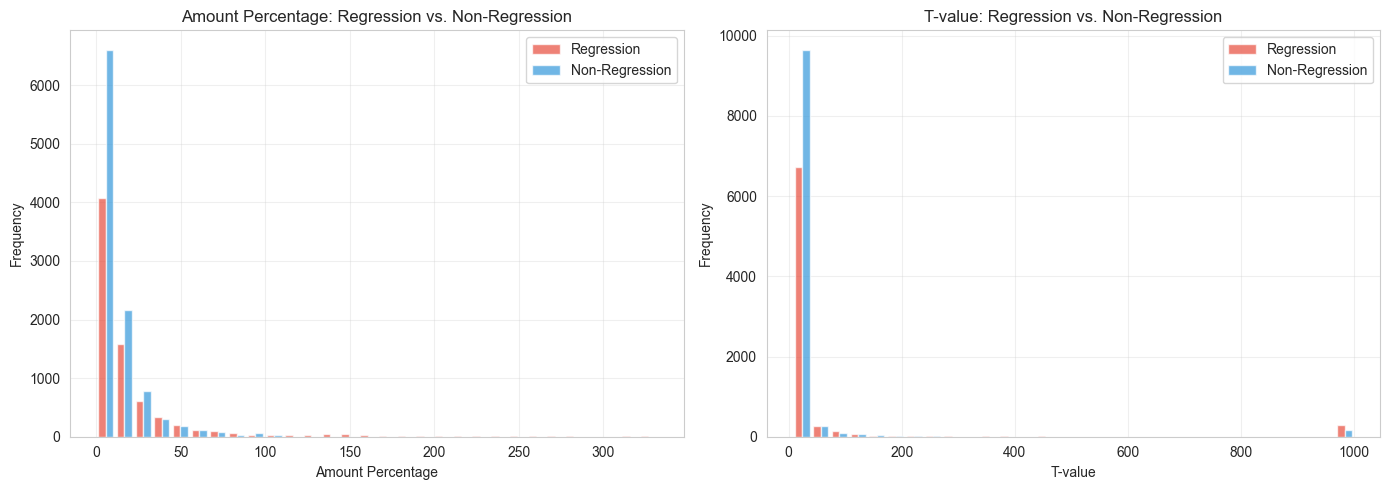


✓ Saved: results/figures/feature_comparison.png


In [24]:
# Visualize comparison for key features
if 'single_alert_amount_pct' in alerts.columns and 'single_alert_t_value' in alerts.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Amount percentage comparison
    regression_pct = alerts[alerts['single_alert_is_regression'] == True]['single_alert_amount_pct'].dropna()
    non_regression_pct = alerts[alerts['single_alert_is_regression'] == False]['single_alert_amount_pct'].dropna()
    
    # Limit to 99th percentile for visualization
    pct_limit = alerts['single_alert_amount_pct'].quantile(0.99)
    regression_pct = regression_pct[regression_pct <= pct_limit]
    non_regression_pct = non_regression_pct[non_regression_pct <= pct_limit]
    
    axes[0].hist([regression_pct, non_regression_pct], bins=30, label=['Regression', 'Non-Regression'],
                color=['#e74c3c', '#3498db'], alpha=0.7)
    axes[0].set_xlabel('Amount Percentage')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Amount Percentage: Regression vs. Non-Regression')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # T-value comparison
    regression_t = alerts[alerts['single_alert_is_regression'] == True]['single_alert_t_value'].dropna()
    non_regression_t = alerts[alerts['single_alert_is_regression'] == False]['single_alert_t_value'].dropna()
    
    # Limit to 99th percentile for visualization
    t_limit = alerts['single_alert_t_value'].quantile(0.99)
    regression_t = regression_t[regression_t <= t_limit]
    non_regression_t = non_regression_t[non_regression_t <= t_limit]
    
    axes[1].hist([regression_t, non_regression_t], bins=30, label=['Regression', 'Non-Regression'],
                color=['#e74c3c', '#3498db'], alpha=0.7)
    axes[1].set_xlabel('T-value')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('T-value: Regression vs. Non-Regression')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/figures/feature_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Saved: results/figures/feature_comparison.png")

## 9. Summary of Findings

Let's summarize what we've learned about this dataset.

In [25]:
print("="*70)
print("DATA EXPLORATION SUMMARY")
print("="*70)

print(f"\n1. Dataset Size:")
print(f"   - Total alerts: {len(alerts):,}")
print(f"   - Total features: {alerts.shape[1]}")

print(f"\n2. Class Distribution:")
class_dist = alerts['single_alert_is_regression'].value_counts()
print(f"   - Regression alerts: {class_dist.get(True, 0):,} ({class_dist.get(True, 0)/len(alerts)*100:.1f}%)")
print(f"   - Non-regression alerts: {class_dist.get(False, 0):,} ({class_dist.get(False, 0)/len(alerts)*100:.1f}%)")

print(f"\n3. Missing Data:")
if len(missing_data) > 0:
    print(f"   - Columns with missing values: {len(missing_data)}")
    print(f"   - Most missing feature: {missing_data.iloc[0]['Column']} ({missing_data.iloc[0]['Missing_Percent']:.1f}%)")
else:
    print(f"   - No missing values found")

print(f"\n4. Key Features Available:")
print(f"   - Magnitude features: {len(available_mag_features)}")
print(f"   - Context features: {len(available_ctx_features)}")

print(f"\n5. Next Steps:")
print(f"   - Clean and prepare features")
print(f"   - Handle missing values")
print(f"   - Encode categorical variables")
print(f"   - Create train/validation/test splits")

print("\n" + "="*70)

DATA EXPLORATION SUMMARY

1. Dataset Size:
   - Total alerts: 17,989
   - Total features: 62

2. Class Distribution:
   - Regression alerts: 7,612 (42.3%)
   - Non-regression alerts: 10,377 (57.7%)

3. Missing Data:
   - Columns with missing values: 30
   - Most missing feature: single_alert_series_signature_suite_public_name (100.0%)

4. Key Features Available:
   - Magnitude features: 5
   - Context features: 1

5. Next Steps:
   - Clean and prepare features
   - Handle missing values
   - Encode categorical variables
   - Create train/validation/test splits



## ✅ Notebook Complete

We've successfully explored the Mozilla alerts dataset! Key takeaways:

1. **Dataset size and structure** - understood how many alerts and features we have
2. **Class distribution** - know the ratio of regressions to non-regressions
3. **Missing values** - identified which features need imputation
4. **Feature distributions** - explored magnitude and context features
5. **Class differences** - observed how features differ between regressions and non-regressions

**Next**: Proceed to Notebook 02 for data preparation and feature engineering.